In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
air_pollution = pd.read_csv('./Air_Pollution_Data.csv', sep = ',')
air_pollution = air_pollution.sort_values(by = air_pollution.columns[1],
                                          ascending = True)
air_pollution.head(5)

,State,Percent Cigarette Smokers CDC 2006 Data (except AZ and WI)
45,Wyoming,140
22,Montana,180
37,South Dakota,190
30,North Dakota,230
27,New Mexico,230


In [4]:
cigar = pd.read_csv('./CDC_Cigarette_Smoking_Data.csv', sep = ',')
cigar = cigar.sort_values(by = cigar.columns[1],
                          ascending = True)
cigar.head(5)

,State,Percent Cigarette Smokers CDC 2006 Data (except AZ and WI)
40,Utah,9.8
2,California,14.9
8,Idaho,16.8
4,Connecticut,17.0
43,Washington,17.1


In [5]:
cancer = pd.read_csv('./CDC_Lung_Cancer_Data.csv', sep = ',')
cancer = cancer.sort_values(by = cancer.columns[1],
                           ascending = True)
cancer.head(5)

,Cases Lung Cancer per 100000 CDC Data 2006 (except AZ and WI),Unnamed: 1
40,Utah,28.0
27,New Mexico,43.9
3,Colorado,48.4
45,Wyoming,48.9
2,California,51.6


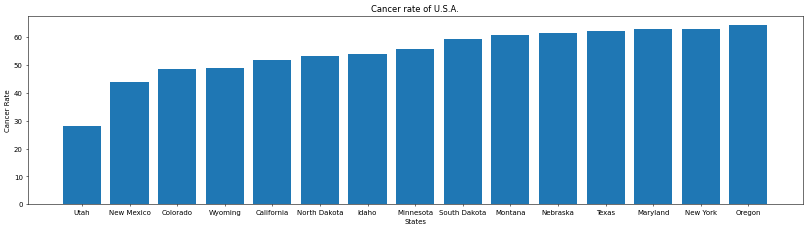

In [20]:
X = cancer[cancer.columns[0]].values[:15].tolist()
Y = cancer[cancer.columns[1]].values[:15].tolist()


plt.bar(X, Y, align='center')
plt.ylabel('Cancer Rate')
plt.xlabel('States')
plt.title('Cancer rate of U.S.A.')
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.dpi"] = 100
plt.show()

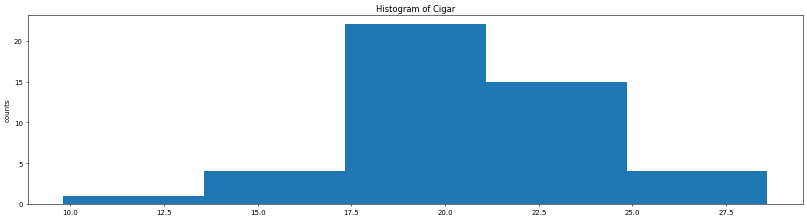

In [17]:
h = cigar[cigar.columns[1]].values.tolist()
plt.hist(h,bins=5)
plt.ylabel('counts')
plt.title('Histogram of Cigar')

plt.show()

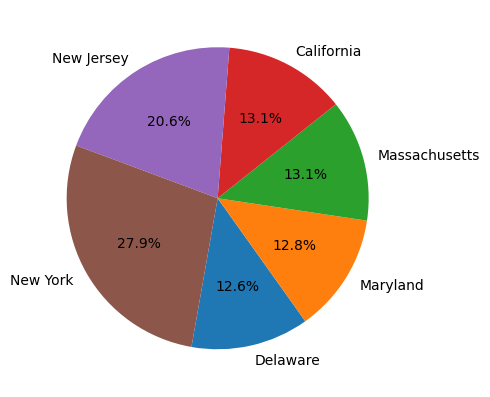

In [21]:
ratio = air_pollution[air_pollution.columns[1]].values[40:].tolist()
labels = air_pollution[air_pollution.columns[0]].values[40:].tolist()

plt.pie(ratio,labels=labels, autopct='%.1f%%', startangle=260)
plt.show()

In [23]:
ret1=air_pollution.mean()
print(float(ret1))
ret2=air_pollution.std()
print(float(ret2))

556.0869565217391
320.44745286600295


In [161]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [162]:
air_pollution = pd.read_csv('./Air_Pollution_Data.csv', sep = ',')
cigar = pd.read_csv('./CDC_Cigarette_Smoking_Data.csv', sep = ',')
cancer = pd.read_csv('./CDC_Lung_Cancer_Data.csv', sep = ',')

Y = cancer[cancer.columns[1]]
X = pd.merge(air_pollution,cigar,how='outer',on='State')
X = X[X.columns.difference([X.columns[0]])]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=19)

In [163]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

print(lr.coef_)

[0.00728302 3.1901009 ]


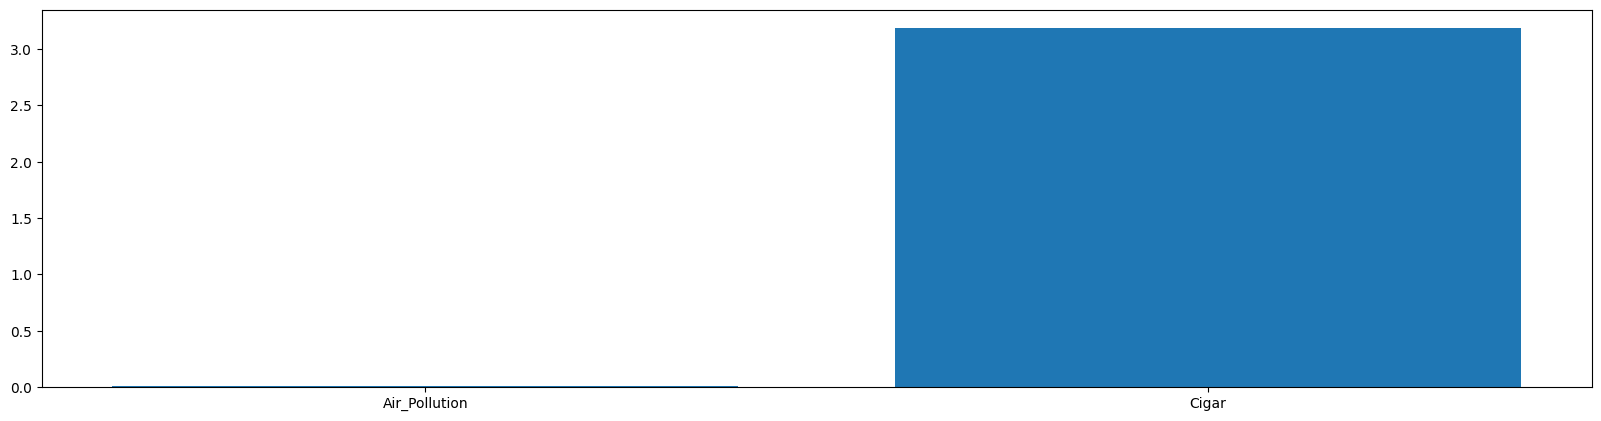

In [164]:
X = ["Air_Pollution", "Cigar"]
Y = lr.coef_
plt.bar(X,Y,align='center')
plt.show()

In [165]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6136190189873243
0.8618393681155727


In [166]:
air_pollution = pd.read_csv('./Air_Pollution_Data.csv', sep = ',')
cigar = pd.read_csv('./CDC_Cigarette_Smoking_Data.csv', sep = ',')
cancer = pd.read_csv('./CDC_Lung_Cancer_Data.csv', sep = ',')

air_pollution[air_pollution.columns[1]] = (air_pollution[air_pollution.columns[1]] 
                                           - air_pollution[air_pollution.columns[1]].min())/(air_pollution[air_pollution.columns[1]].max()-air_pollution[air_pollution.columns[1]].min())
cigar[cigar.columns[1]] = (cigar[cigar.columns[1]] 
                                           - cigar[cigar.columns[1]].min())/(cigar[cigar.columns[1]].max()-cigar[cigar.columns[1]].min())
cancer[cancer.columns[1]] = (cancer[cancer.columns[1]] 
                                           - cancer[cancer.columns[1]].min())/(cancer[cancer.columns[1]].max()-cancer[cancer.columns[1]].min())


Y = cancer[cancer.columns[1]]
X = pd.merge(air_pollution,cigar,how='outer',on='State')
X = X[X.columns.difference([X.columns[0]])]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=19)


In [167]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

print(lr.coef_)

[0.1852329  0.86667481]


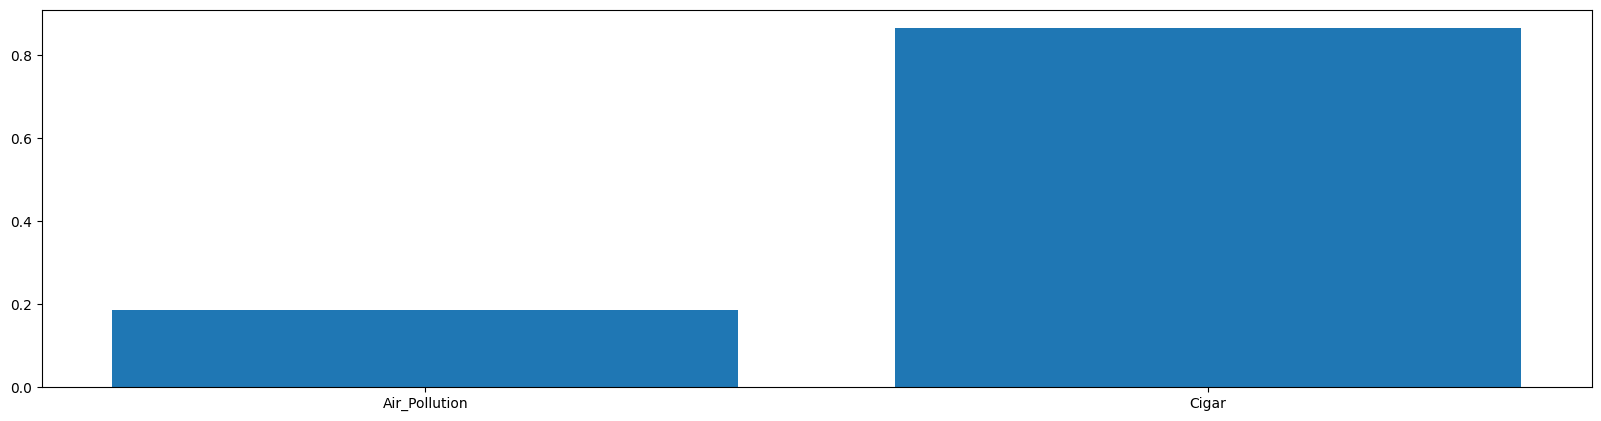

In [168]:
X = ["Air_Pollution", "Cigar"]
Y = lr.coef_
plt.bar(X,Y,align='center')
plt.show()

In [169]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6136190189873243
0.8618393681155734
